In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from pathlib import Path

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [2]:
# Import the data
salaries = pd.read_csv("../Outputs/Full_Salary_Data.csv")
salaries

,Experience_Years,Job_Position,Salary,Company_Size,Year
0,15,Data Analyst,130000.0,1000,2022
1,22,Data Analyst,450000.0,1000,2022
2,5,Data Analyst,78084.0,100000,2022
3,12,Data Analyst,15480.0,100000,2022
4,11,Data Analyst,200000.0,50000,2022
...,...,...,...,...,...
43598,5,Data Scientist,110000.0,100,2016
43599,10,Data Scientist,190000.0,100,2016
43600,10,Data Scientist,160000.0,1000,2016
43601,15,Data Scientist,200000.0,10,2016


In [3]:
salaries['Job_Position'] = salaries['Job_Position'].replace(["Data Analyst"],[1])
salaries['Job_Position'] = salaries['Job_Position'].replace(["Data Scientist"],[2])
salaries['Job_Position'] = salaries['Job_Position'].replace(["Machine Learning Engineer"],[3])

In [4]:
salaries = salaries[salaries['Salary'] <= 500000]
salaries = salaries[salaries['Experience_Years'] <= 15]
salaries = salaries.drop(columns='Company_Size')

salaries.head()

,Experience_Years,Job_Position,Salary,Year
0,15,1,130000.0,2022
2,5,1,78084.0,2022
3,12,1,15480.0,2022
4,11,1,200000.0,2022
5,5,1,54025.0,2022


In [5]:
# Split the data into X_train, X_test, y_train, y_test
x_salary = salaries.drop(columns=['Salary'])
y_salary = salaries['Salary']

x_train, x_test, y_train, y_test = train_test_split(x_salary, y_salary, random_state=50)


# Train a Logistic Regression model print the model score
classifier = LinearRegression()
classifier.fit(x_train, y_train)

print(f'Training Data Score: {classifier.score(x_train, y_train)}')
print(f'Testing Data Score: {classifier.score(x_test, y_test)}')

Training Data Score: 0.054398650932110604
Testing Data Score: 0.05184062824979463


## Filter down data to percentiles

In [6]:
new_salaries = pd.DataFrame()

for year in range(1,16):
    experience = salaries.loc[salaries['Experience_Years'] == year]
    
    low, high = experience['Salary'].quantile([0.35,0.85])
    salaries_quantile = experience.query('{low}<Salary<{high}'.format(low=low,high=high))
    
    new_salaries = pd.concat([new_salaries,salaries_quantile], ignore_index=True)  
new_salaries.head()

,Experience_Years,Job_Position,Salary,Year
0,1,1,26661.0,2022
1,1,1,60000.0,2022
2,1,1,48000.0,2022
3,1,1,25596.0,2022
4,1,1,75384.0,2022


In [7]:
# Split the data into X_train, X_test, y_train, y_test
x_salary = new_salaries.drop(columns=['Salary'])
y_salary = new_salaries['Salary']

x_train, x_test, y_train, y_test = train_test_split(x_salary, y_salary, random_state=50)


# Train a Logistic Regression model print the model score
classifier = LinearRegression()
classifier.fit(x_train, y_train)

print(f'Training Data Score: {classifier.score(x_train, y_train)}')
print(f'Testing Data Score: {classifier.score(x_test, y_test)}')

Training Data Score: 0.3965861316167174
Testing Data Score: 0.4249168779759749


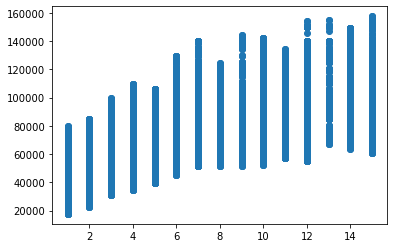

In [8]:
x = new_salaries["Experience_Years"]
y = new_salaries["Salary"]
plt.scatter(x,y)

In [9]:
#secondary filtering
new_salaries2 = pd.DataFrame()

for year in range(1,16):
    experience = new_salaries.loc[new_salaries['Experience_Years'] == year]
    
    low, high = experience['Salary'].quantile([0.5,0.90])
    salaries_quantile = experience.query('{low}<Salary<{high}'.format(low=low,high=high))
    
    new_salaries2 = pd.concat([new_salaries2,salaries_quantile], ignore_index=True)
    
new_salaries2.to_csv("../Outputs/New_Salaries.csv", index=False)

## Machine Learning

### Combined

In [10]:
# Split the data into X_train, X_test, y_train, y_test
x_salary = new_salaries2.drop(columns=['Salary'])
y_salary = new_salaries2['Salary']

x_train, x_test, y_train, y_test = train_test_split(x_salary, y_salary, random_state=50)

In [11]:
# Train a Logistic Regression model print the model score
classifier = LinearRegression()
classifier.fit(x_train, y_train)

print(f'Training Data Score: {classifier.score(x_train, y_train)}')
print(f'Testing Data Score: {classifier.score(x_test, y_test)}')

Training Data Score: 0.7776540022867846
Testing Data Score: 0.7609521812485739


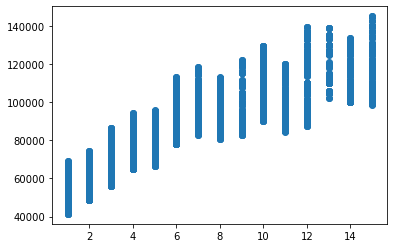

In [12]:
import matplotlib.pyplot as plt
x = new_salaries2["Experience_Years"]
y = new_salaries2["Salary"]
plt.scatter(x,y)

In [13]:
print(classifier.intercept_)
print(classifier.coef_)

-1491541.5619429427
[4999.00626029   77.49943714  764.98533   ]


### Full Equation 
y= 5000(Years of Experience) + 138(Job Title) + 9375(Current Year) - 1491541.56

Job Title:
1 = Data Analyst
2 = Data Scientist
3 = Machine Learning Engineer



### Years of Experience

In [14]:
# Split the data into X_train, X_test, y_train, y_test
x_salary = new_salaries2.drop(columns=['Salary', 'Job_Position','Year'])
y_salary = new_salaries2['Salary']

x_train, x_test, y_train, y_test = train_test_split(x_salary, y_salary, random_state=50)

#
#
#
# Train a Logistic Regression model print the model score
classifier = LinearRegression()
classifier.fit(x_train, y_train)

print(f'Training Data Score: {classifier.score(x_train, y_train)}')
print(f'Testing Data Score: {classifier.score(x_test, y_test)}')

#
#
#

print(classifier.intercept_)
print(classifier.coef_)

Training Data Score: 0.7748727809394531
Testing Data Score: 0.7610057825289467
53533.60986924685
[4998.9567566]


### Equation for Years of Experience
y = 4999(Years of Experience) + 53533

### Job Title

In [15]:
# Split the data into X_train, X_test, y_train, y_test
x_salary = new_salaries2.drop(columns=['Salary', 'Experience_Years','Year'])
y_salary = new_salaries2['Salary']

x_train, x_test, y_train, y_test = train_test_split(x_salary, y_salary, random_state=50)

#
#
#
# Train a Logistic Regression model print the model score
classifier = LinearRegression()
classifier.fit(x_train, y_train)

print(f'Training Data Score: {classifier.score(x_train, y_train)}')
print(f'Testing Data Score: {classifier.score(x_test, y_test)}')

#
#
#

print(classifier.intercept_)
print(classifier.coef_)

Training Data Score: 0.0001184597671153309
Testing Data Score: -0.0011239127125994841
82921.24223888172
[-298.29045064]


### Equation for Job Title
y = -298(Job Title) + 82921

### Year

In [16]:
# Split the data into X_train, X_test, y_train, y_test
x_salary = new_salaries2.drop(columns=['Salary', 'Job_Position','Experience_Years'])
y_salary = new_salaries2['Salary']

x_train, x_test, y_train, y_test = train_test_split(x_salary, y_salary, random_state=50)

#
#
#
# Train a Logistic Regression model print the model score
classifier = LinearRegression()
classifier.fit(x_train, y_train)

print(f'Training Data Score: {classifier.score(x_train, y_train)}')
print(f'Testing Data Score: {classifier.score(x_test, y_test)}')

#
#
#

print(classifier.intercept_)
print(classifier.coef_)

Training Data Score: 0.0028485562624277483
Testing Data Score: 0.006521998689264841
-1486966.430258532
[777.05101796]


### Equation for Current Year
y = 777(Years of Experience) - 1486966 

## Final Data Frame

In [17]:
new_salaries2['Salary'].groupby(new_salaries2['Experience_Years']).describe()

,count,mean,std,min,25%,50%,75%,max
Experience_Years,,,,,,,,
1,585.0,53709.630721,7412.822117,41385.0,48000.00,52968.0,60000.000000,69000.0
2,1127.0,59378.799547,7376.868889,48500.0,52872.00,59544.0,65000.000000,74364.0
3,668.0,69461.357376,8686.498160,56211.0,61368.00,69091.5,75691.143939,86604.0
4,489.0,77535.181009,7944.056634,64860.0,70368.00,77000.0,85000.000000,94230.0
5,1186.0,79632.858331,7846.382541,66500.0,73433.00,79552.0,85671.000000,95968.0
6,358.0,91723.564448,9680.927607,77831.0,84019.00,90000.0,100000.000000,113000.0
7,275.0,98452.547805,9750.721824,83000.0,90000.00,98000.0,106352.303030,118452.0
8,568.0,96601.151142,8841.085472,80776.0,88824.25,97116.5,104964.000000,113000.0
9,171.0,99773.990671,12543.810743,82736.0,89400.00,95000.0,110000.000000,121979.0


In [18]:
new_salaries2

,Experience_Years,Job_Position,Salary,Year
0,1,1,60000.0,2022
1,1,1,48000.0,2022
2,1,1,59720.0,2022
3,1,1,47990.0,2022
4,1,1,57000.0,2022
...,...,...,...,...
6732,15,2,100000.0,2016
6733,15,2,120000.0,2016
6734,15,2,120000.0,2016
6735,15,2,130000.0,2016


## Create Database for Final Salary Calculation

In [19]:
import warnings
warnings.filterwarnings("once")

In [20]:
experience = [*range(1,61)]
title = [1,2,3]
salaries_calculation = pd.DataFrame()


for year in range(2016,2051):
    salaries_calculation1 = pd.DataFrame()
    salaries_calculation1['Years_of_Experience'] = experience
    salaries_calculation1['Job_Title'] = 1
    salaries_calculation1['Year'] = year

    salaries_calculation2 = pd.DataFrame()
    salaries_calculation2['Years_of_Experience'] = experience
    salaries_calculation2['Job_Title'] = 2
    salaries_calculation2['Year'] = year


    salaries_calculation3 = pd.DataFrame()
    salaries_calculation3['Years_of_Experience'] = experience
    salaries_calculation3['Job_Title'] = 3
    salaries_calculation3['Year'] = year


    salaries_calculation = pd.concat([salaries_calculation,salaries_calculation1,salaries_calculation2,salaries_calculation3], 
                                     ignore_index=True)

# salaries_calculation

In [24]:
salaries_calculation['Salary'] = 4999.00626029*(salaries_calculation['Years_of_Experience']) + 77.49943714*(salaries_calculation['Job_Title']) + 764.98533*(salaries_calculation['Year']) - 1491541.5619429427
salaries_calculation

,Years_of_Experience,Job_Title,Year,Salary
0,1,1,2016,55745.369034
1,2,1,2016,60744.375295
2,3,1,2016,65743.381555
3,4,1,2016,70742.387815
4,5,1,2016,75741.394076
...,...,...,...,...
6295,56,3,2050,356855.213445
6296,57,3,2050,361854.219705
6297,58,3,2050,366853.225965
6298,59,3,2050,371852.232226


In [25]:
salaries_calculation.to_csv("../Outputs/Salary_Predictions.csv", index=False)